<a href="https://colab.research.google.com/github/Gitstrong3333/MachineLearning_Projects/blob/main/Foodhub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# to manipulate data
import numpy as np
import pandas as pd

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to split data into train and test
from sklearn.model_selection import train_test_split

# to create a decision tree
from sklearn.tree import DecisionTreeClassifier

# to create ensemble models
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

# to create extreme gradient boosting
from xgboost import XGBClassifier


# to evaluate models
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# to tune  models
from sklearn.model_selection import GridSearchCV

In [ ]:
#---------------------------------------------------------
# Remove warnings
import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/foodhub_order.csv'  # adjust if it's in a subfolder
df = pd.read_csv(file_path)

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
df.shape

(1898, 9)

In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [ ]:
print("Minimum time for food to be prepared: ",df.food_preparation_time.min())
print("Maximum time for food to be prepared: ",df.food_preparation_time.max())
print("Average time for food to be prepared: ",round(df.food_preparation_time.mean(),2))

Minimum time for food to be prepared:  20
Maximum time for food to be prepared:  35
Average time for food to be prepared:  27.37


In [ ]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [ ]:
#Univariate Analysis

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

In [ ]:
# check the number of unique customer ID
df['customer_id'].nunique()

1200

In [ ]:
# plotting Customer_id using countplot
plt.figure(figsize=(200,80)) #Set the figure size
sns.countplot(data=df, x='customer_id')
plt.show()

In [ ]:
pd.DataFrame(df['customer_id'].value_counts()).value_counts()

,count
count,
1,784
2,267
3,83
4,33
5,19
6,6
7,4
8,1
9,1


In [ ]:
#Restuarant Name

In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

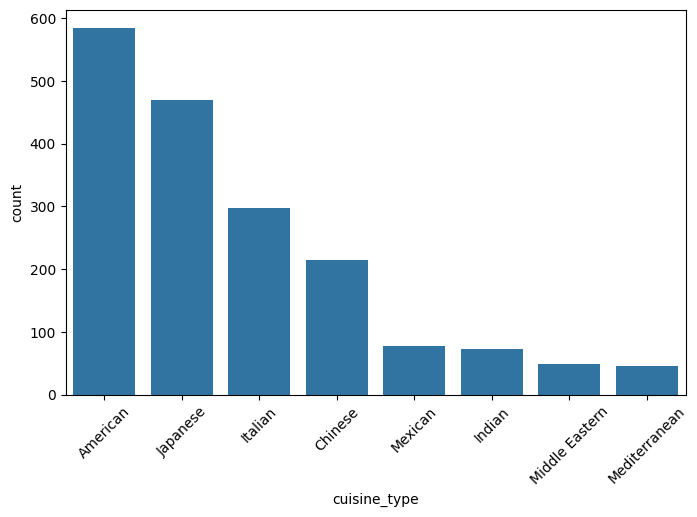

In [ ]:
plt.figure(figsize = (8,5)) #set the figure size
sns.countplot(data = df, x = 'cuisine_type',order=df.cuisine_type.value_counts().iloc[:8].index)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# for numerical variables
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  #

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

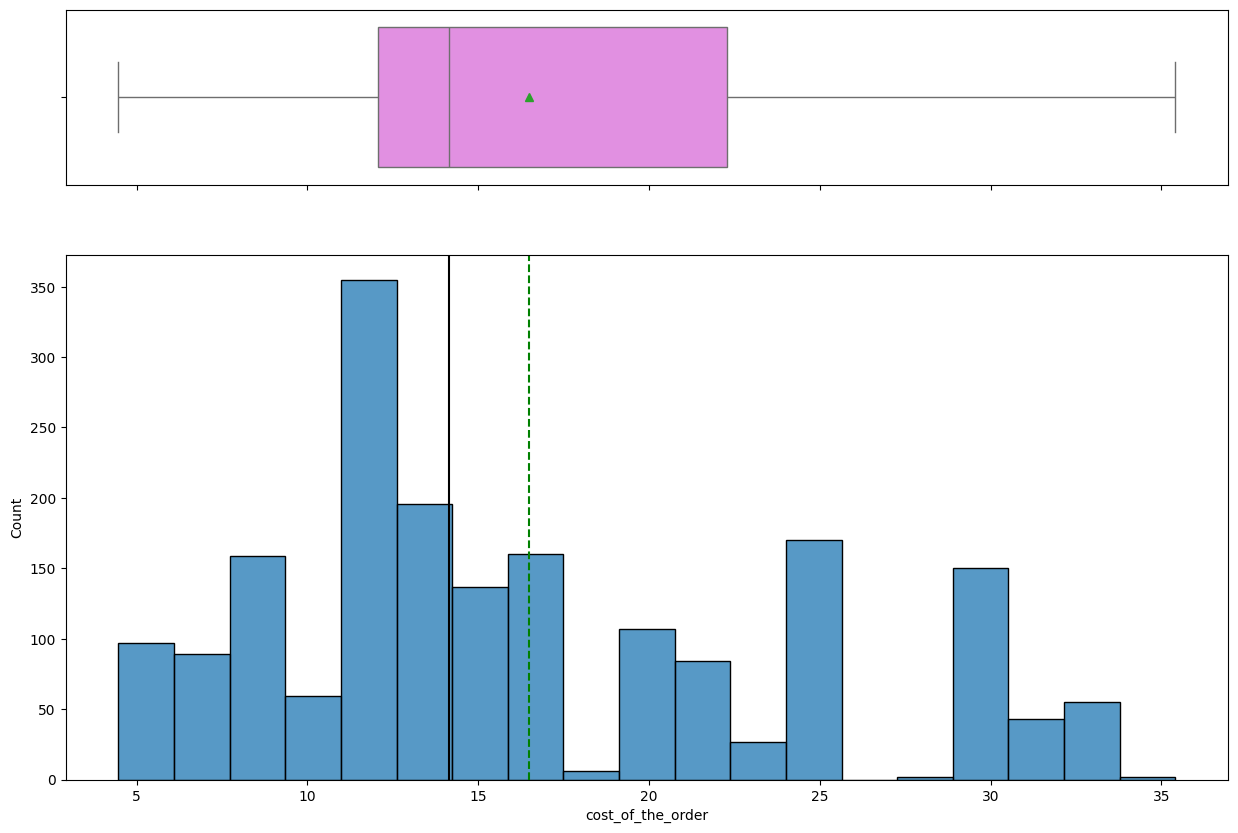

In [ ]:
histogram_boxplot(df,'cost_of_the_order')

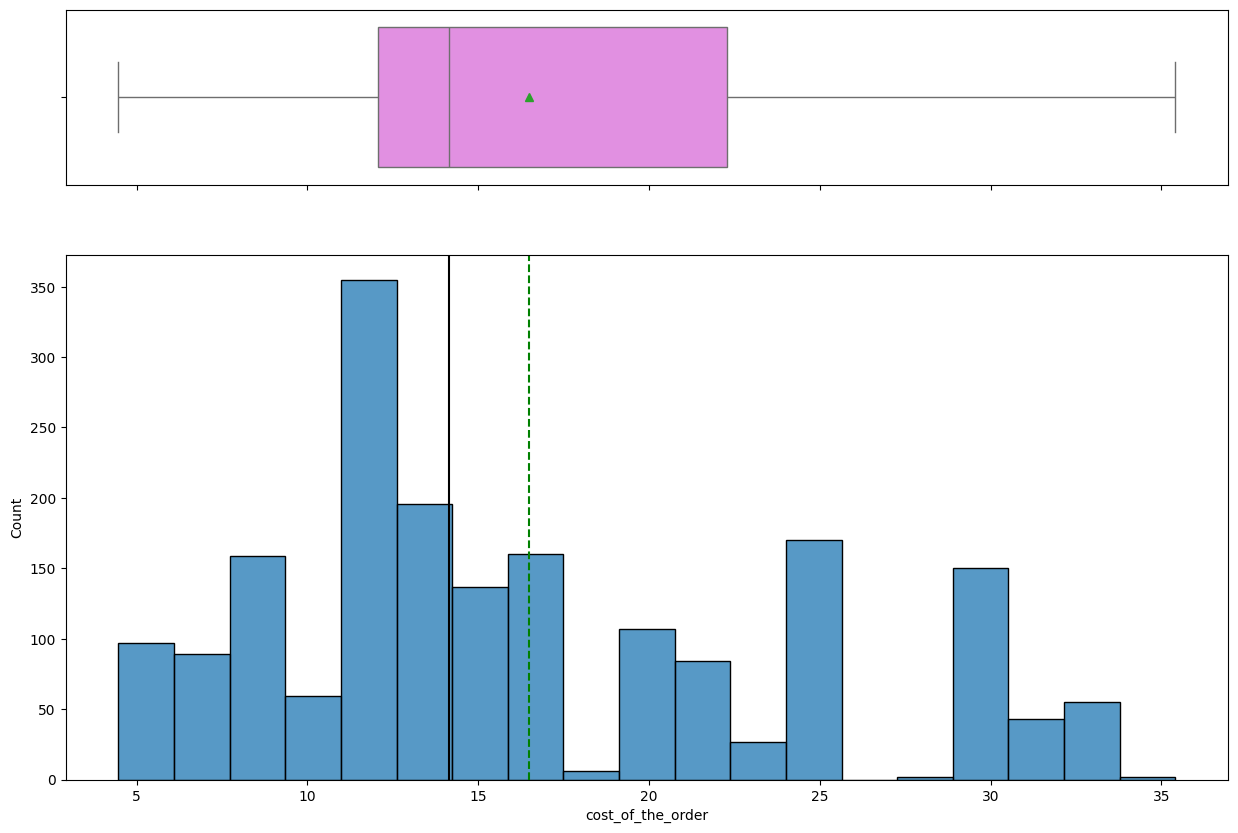

In [ ]:
histogram_boxplot(df,'cost_of_the_order')

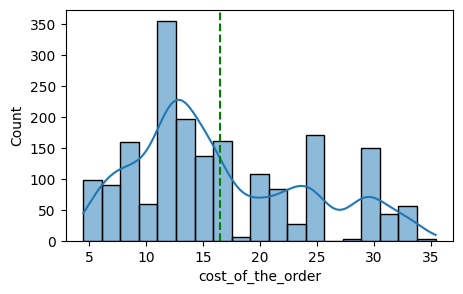

In [ ]:
# plotting cost of order using histogram
plt.figure(figsize = (5,3)) #set the figure size
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.axvline(df['cost_of_the_order'].mean(),color='g',linestyle='--') #mean value of the column indicated with doted line symbol
plt.show()

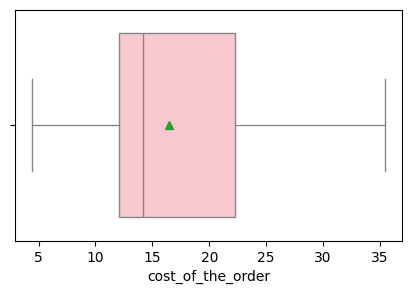

In [ ]:
plt.figure(figsize = (5,3)) #set the figure size
sns.boxplot(data=df,x='cost_of_the_order', showmeans=True, color='pink')
plt.show()

In [ ]:
# Day of the week
# Check the unique values
df['day_of_the_week'].nunique()

2

In [ ]:
print('Weekends are', (round(df['day_of_the_week'].value_counts()[0])),'i.e.', round(df['day_of_the_week'].value_counts()[0]/len(df) * 100,2), '% of the day')
print('Weekdays are', (round(df['day_of_the_week'].value_counts()[1])),'i.e.',round(df['day_of_the_week'].value_counts()[1]/len(df) * 100,2), '% of the day')

Weekends are 1351 i.e. 71.18 % of the day
Weekdays are 547 i.e. 28.82 % of the day


<Axes: xlabel='day_of_the_week', ylabel='count'>

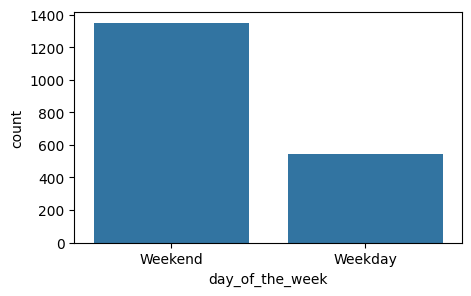

In [ ]:
plt.figure(figsize = (5,3)) #set the figure size
sns.countplot(data = df, x = 'day_of_the_week')

In [ ]:
#Rating
# Check the unique values
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

<Axes: xlabel='rating', ylabel='count'>

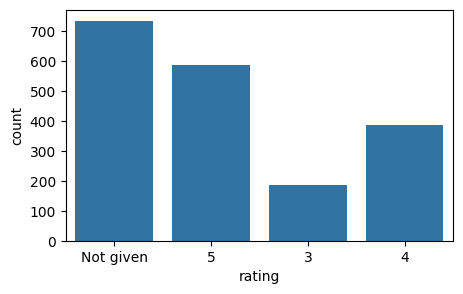

In [ ]:
# plotting the order rating using countplot
plt.figure(figsize = (5,3)) #set the figure size
sns.countplot(data = df, x = 'rating')

In [ ]:
print(df['rating'].value_counts())
print(round(100*df['rating'].value_counts()/len(df),2))

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
rating
Not given    38.78
5            30.98
4            20.34
3             9.91
Name: count, dtype: float64


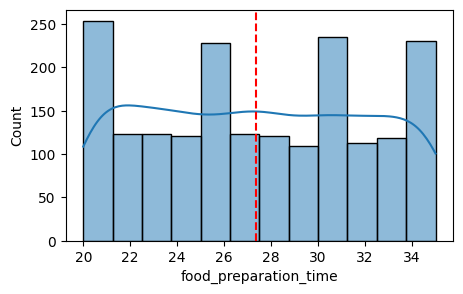

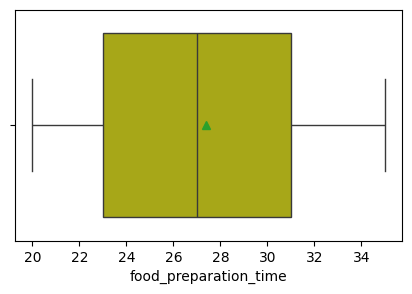

In [ ]:
# plotting the time of food preparation using histogram
plt.figure(figsize = (5,3)) #set the figure size
sns.histplot(data=df, x='food_preparation_time', kde=True) #To identify pattern kde(Kernel Density Estimation) is assigned True
plt.axvline(df['food_preparation_time'].mean(),color='r',linestyle='--') #mean value of the column indicated with doted line symbol
plt.show()
plt.figure(figsize = (5,3)) #set the figure size
# plotting food_preparation_time using boxplot
sns.boxplot(data=df,x='food_preparation_time', showmeans=True, color='y') #mean value is showing with a symbol
plt.show()

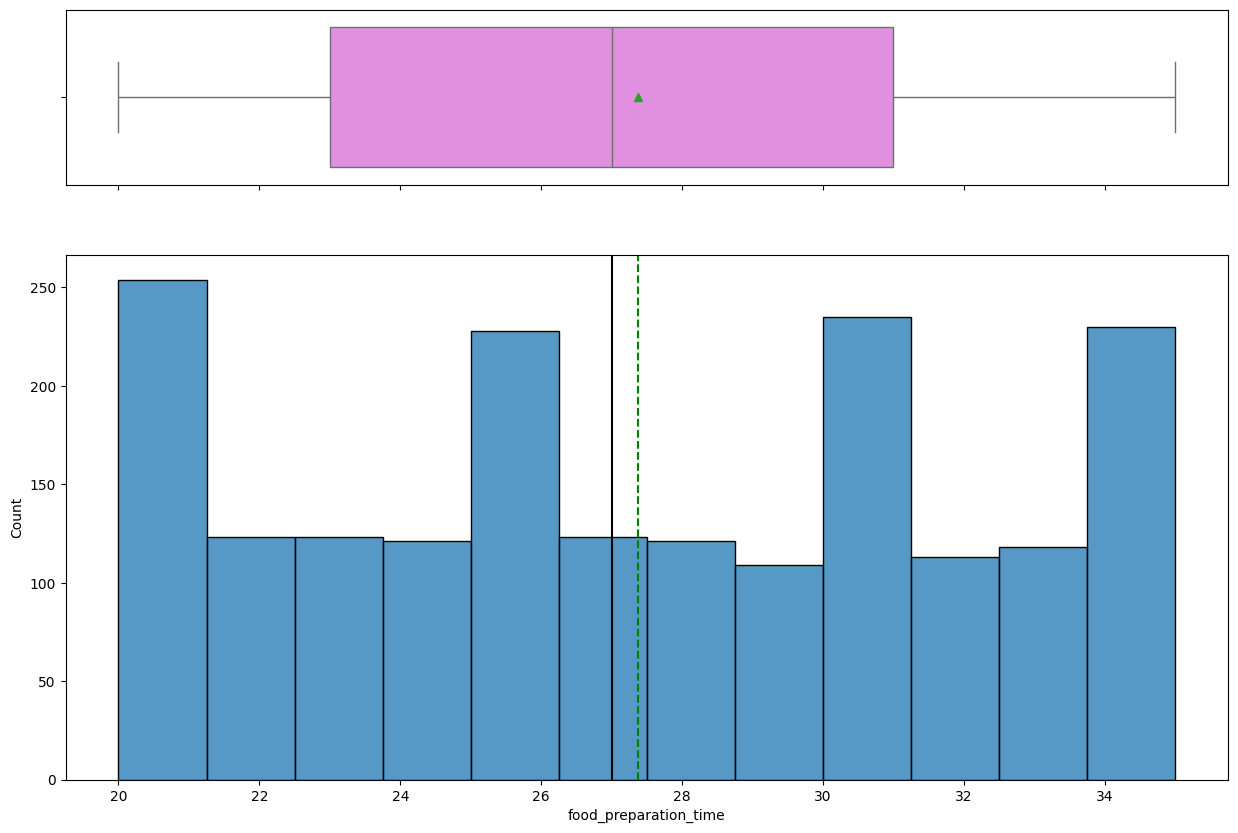

In [ ]:
histogram_boxplot(df,'food_preparation_time')

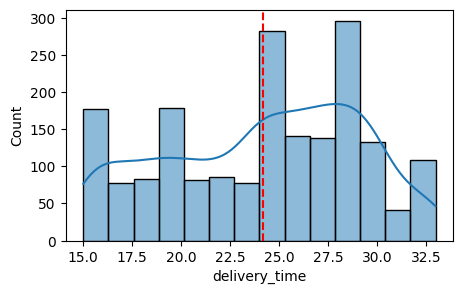

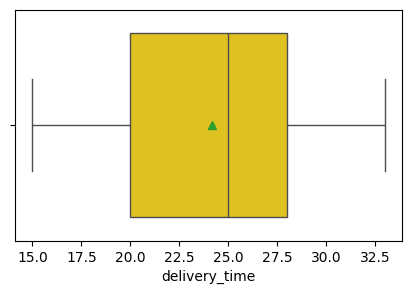

In [ ]:
# plotting the time of food preparation using histogram
plt.figure(figsize = (5,3)) #set the figure size
sns.histplot(data=df, x='delivery_time', kde=True) #To identify pattern kde(Kernel Density Estimation) is assigned True
plt.axvline(df['delivery_time'].mean(),color='r',linestyle='--') #mean value of the column indicated with doted line symbol
plt.show()
plt.figure(figsize = (5,3)) #set the figure size
# plotting food_preparation_time using boxplot
sns.boxplot(data=df,x='delivery_time', showmeans=True, color='gold') #mean value is showing with a symbol
plt.show()

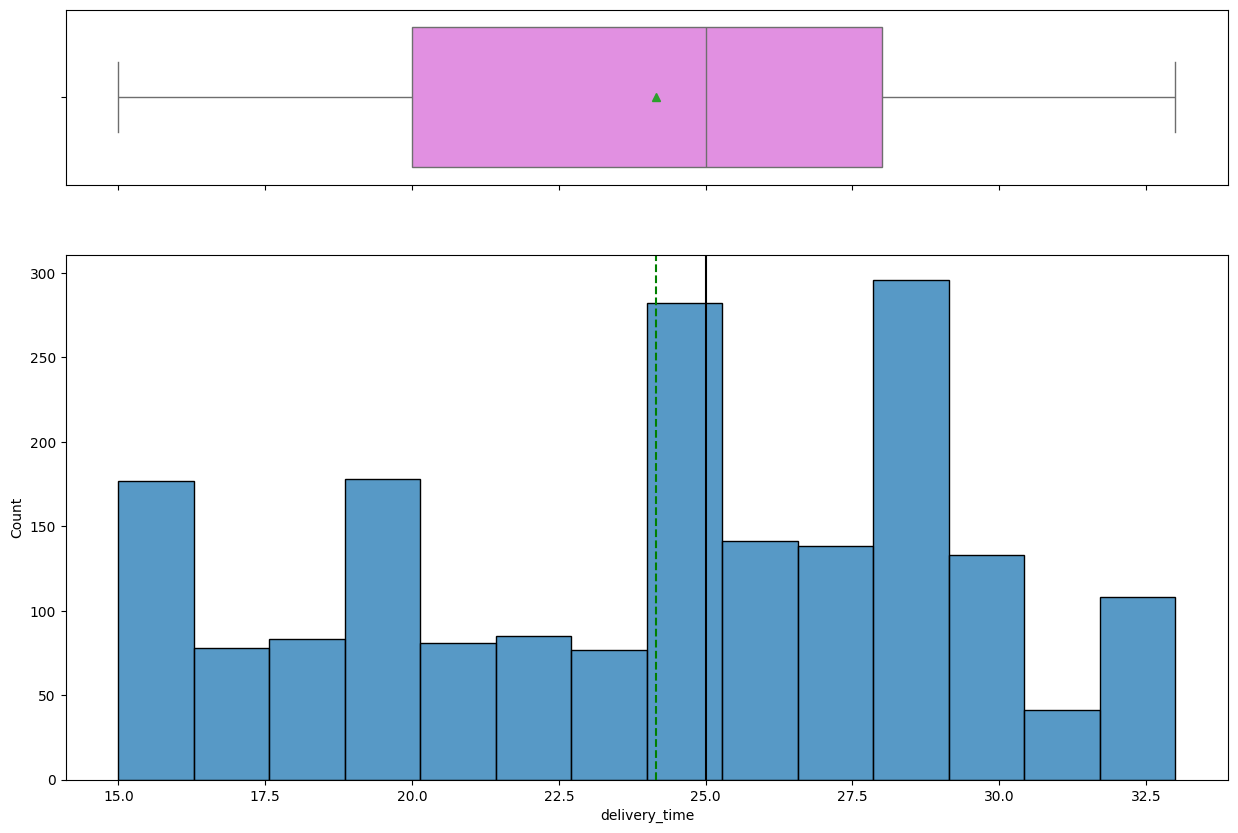

In [ ]:
histogram_boxplot(df,'delivery_time')

In [ ]:
# Count the specific column data with values and by default return first five observations with head function
df['restaurant_name'].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


In [ ]:
# Count the values of cuisine type by filtering weekend days
df[df['day_of_the_week']=="Weekend"].groupby('day_of_the_week')['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean             11
                 Southern           11
                 Spanish            11
                 Vietnamese          4
Name: count, dtype: int64

In [ ]:
from pandas._libs.tslibs import normalize_i8_timestamps
# Calculate the total number of orders
TO=df['cost_of_the_order'].count()
# Calculate the number of orders cost more than 20 dollars
cost20=df['cost_of_the_order'][df['cost_of_the_order']>20].count()
#calculate the percentage
print("The orders cost more than 20 dollars is {0} percent".format(round((100*cost20/TO),2)))

The orders cost more than 20 dollars is 29.24 percent


In [ ]:
# Count the average order delivery time using pandas mean() function
print("Average order delivery time {0} minutes ".format(round(df['delivery_time'].mean(),2)))

Average order delivery time 24.16 minutes 


In [ ]:
# Count the number of orders the top 3 customers have been placed
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


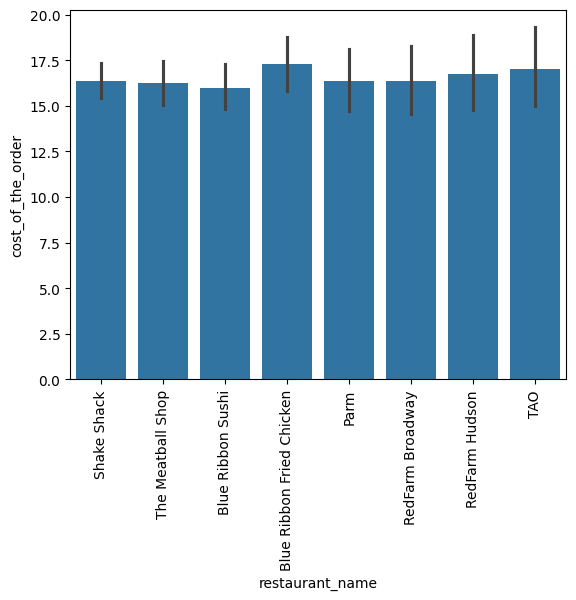

In [ ]:
#Multivariate Analysis
#Restaurant vs Cost_of_the_order
# plt.figure(figsize = (15,8))
sns.barplot(data = df, x = 'restaurant_name', y = 'cost_of_the_order',
            order = df.restaurant_name.value_counts().iloc[:8].index)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='cuisine_type', ylabel='count'>

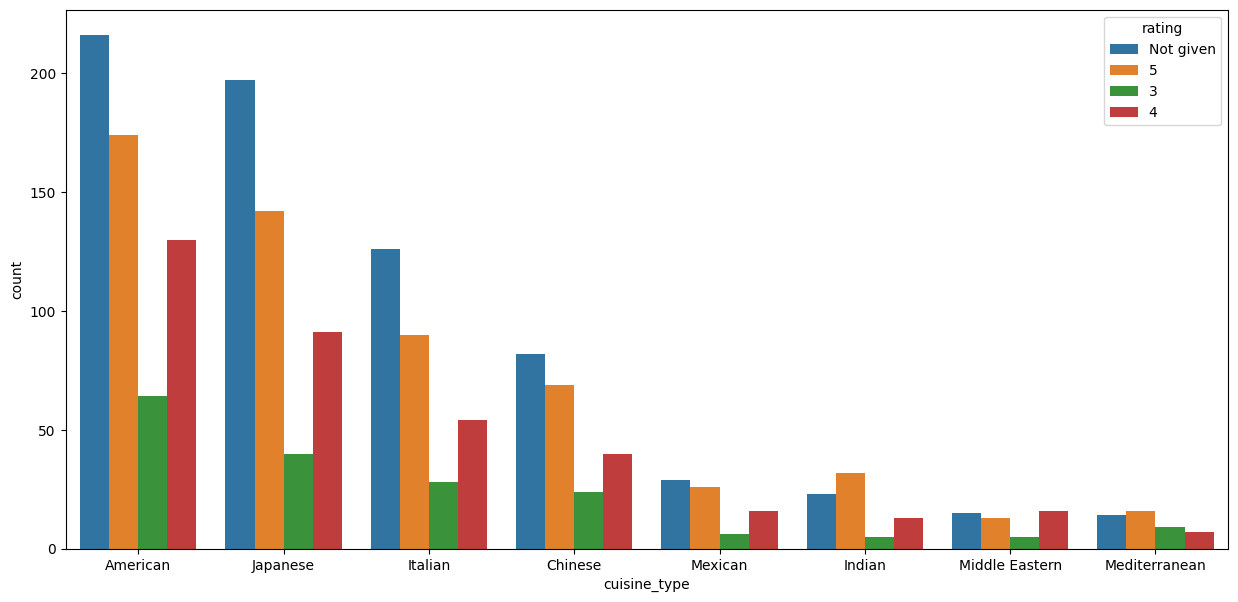

In [ ]:
# Relationship between cuisine type and rating
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'cuisine_type', hue = 'rating', order = df.cuisine_type.value_counts().iloc[:8].index) #hue is used to group the data based on rating

<Figure size 2500x1000 with 0 Axes>

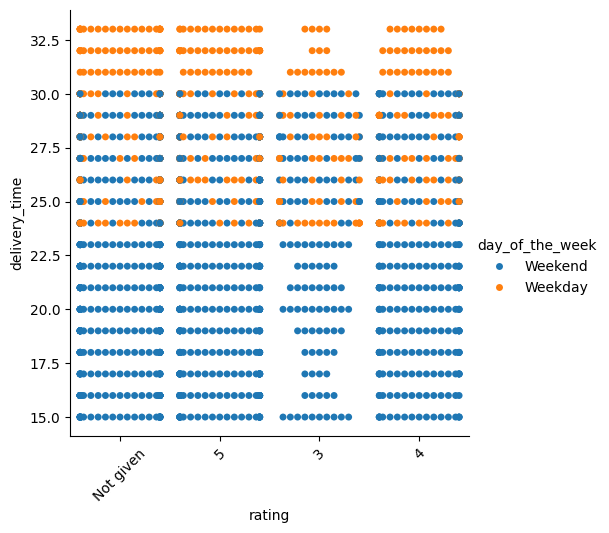

In [ ]:
# Relationship between rating, delivery time and day of the week
plt.figure(figsize = (25,10))
#Swarm plot used for categorical data
sns.catplot(data=df, x='rating', y='delivery_time', hue="day_of_the_week", kind="swarm") # hue is used to group the data based on day of the week
plt.xticks(rotation=45)
plt.show()

<Figure size 2000x700 with 0 Axes>

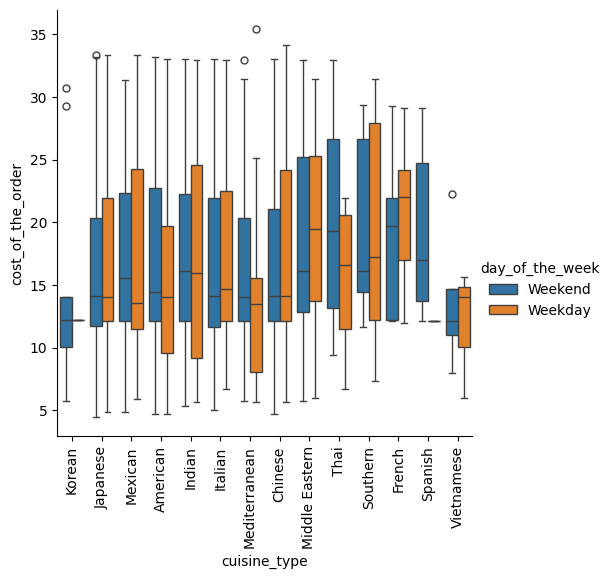

In [ ]:
# Relationship between cost of order, cuisine type and day of the week
plt.figure(figsize = (20,7))
sns.catplot(data=df, x="cuisine_type", y="cost_of_the_order", hue="day_of_the_week",kind="box") # hue is used to group the data based on day of the week
plt.xticks(rotation=90)
plt.show()

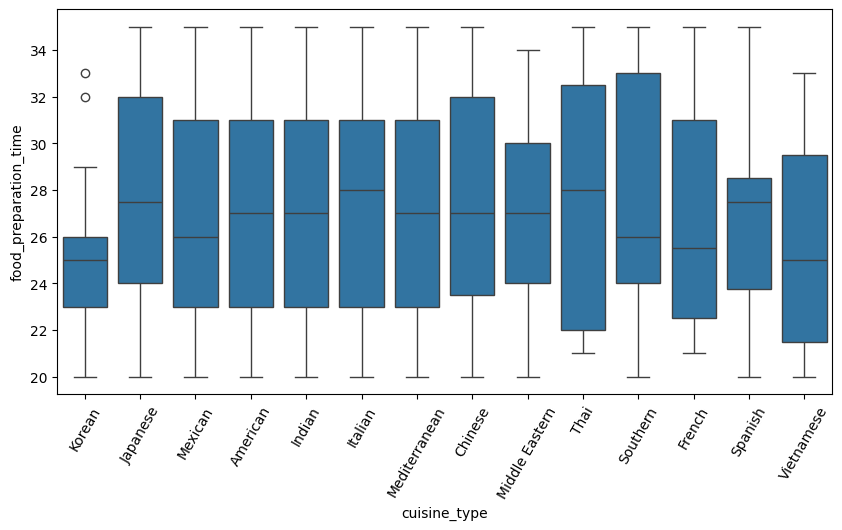

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="cuisine_type", y="food_preparation_time")
plt.xticks(rotation = 60)
plt.show()

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

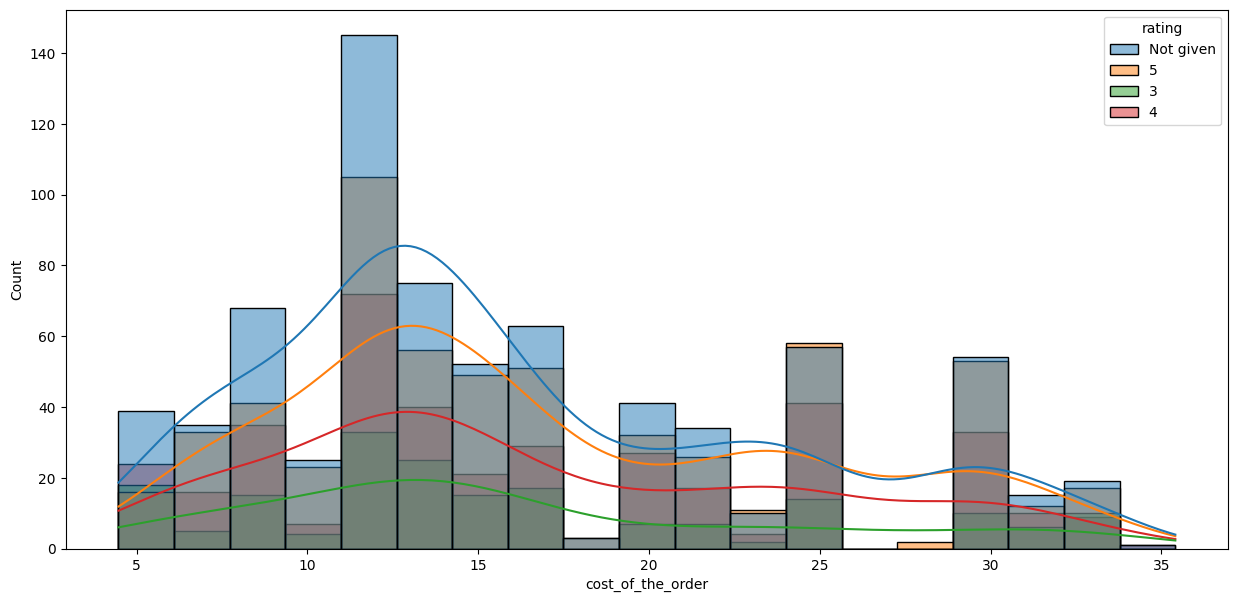

In [ ]:
# Relationship between cost of the order and rating
plt.figure(figsize = (15,7)) #set the figure size
sns.histplot(data = df, x = 'cost_of_the_order', hue = 'rating', kde = True) #To identify pattern kde(Kernel Density Estimation) assigned True and hue is used to group the data based on

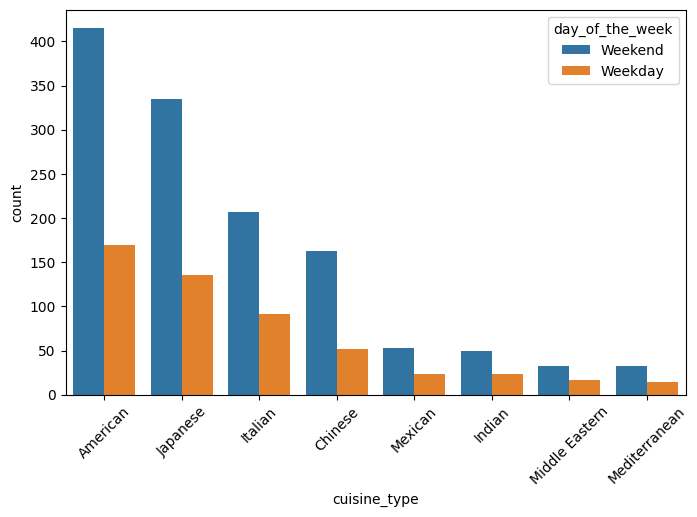

In [ ]:
# plotting cuisine type and day of the week using countplot
plt.figure(figsize = (8,5)) #set the figure size
sns.countplot(data = df, x = 'cuisine_type',hue='day_of_the_week',order=df.cuisine_type.value_counts().iloc[:8].index) # hue is used to group the data based on day of the week
plt.xticks(rotation=45)
plt.show()

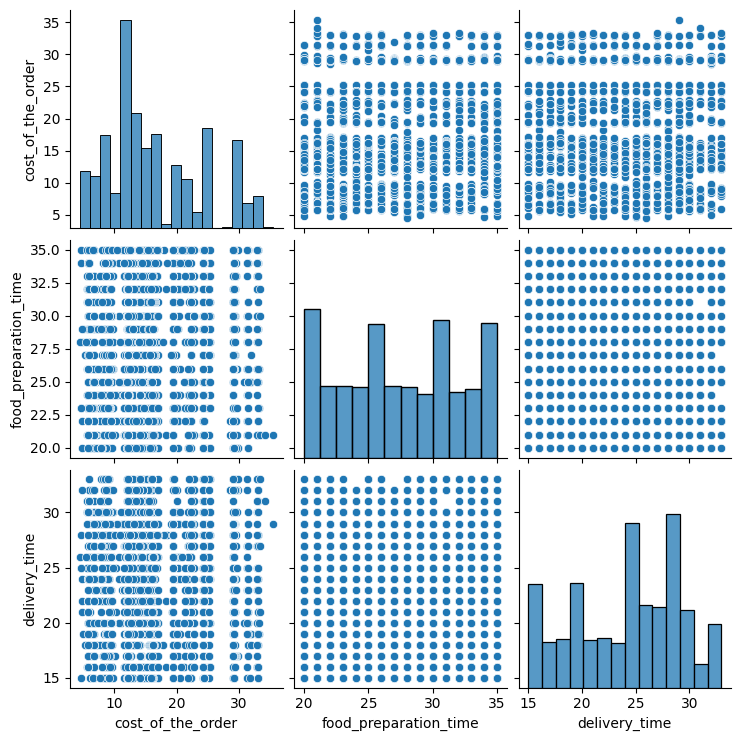

In [ ]:
# Relationship among numeric values
sns.pairplot(data = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])

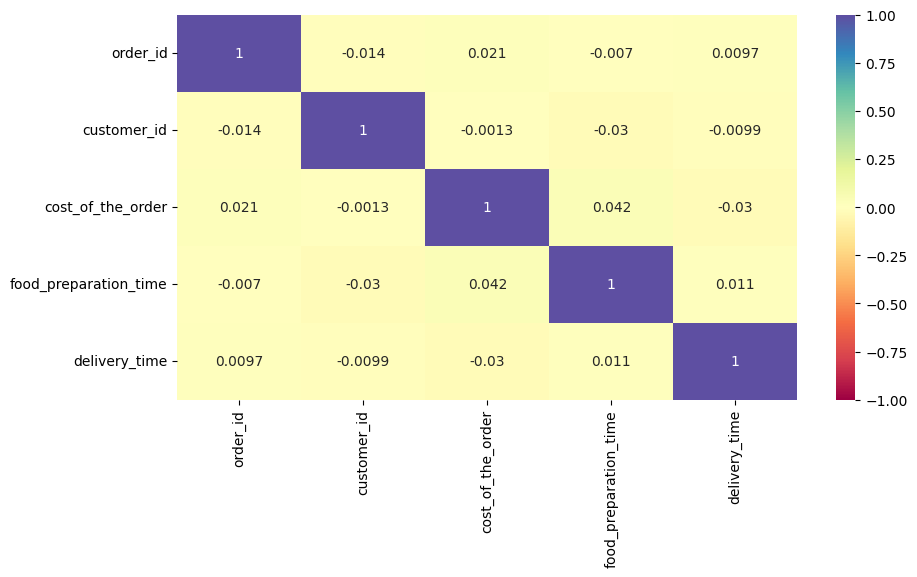

In [ ]:
# Correlation using heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']  # get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() # Complete the code to find the mean rating

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


In [ ]:
# Define a function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

# Call the defined compute_rev function to get the revenue and calculate the total revenue using sum function
print('The net revenue is around', round(df['cost_of_the_order'].apply(compute_rev).sum(), 2), 'dollars')

The net revenue is around 6166.3 dollars


In [ ]:
# Create a column with the total time of food preparation and delivery
df['total_time']=df['food_preparation_time']+df['delivery_time']
# Count the orders those take more than 60 minutes to deliver
Order_60=df['total_time'][df['total_time']>60].count()
#Count the percentage of orders take more than 60 minutes to deliver
print("{0} percent of orders take more than 60 minutes to deliver".format(round(100*Order_60/df['total_time'].count(),2)))

10.54 percent of orders take more than 60 minutes to deliver


In [ ]:
# Calculate mean delivery time based on the day of the week
m_del_time=df.groupby('day_of_the_week')['delivery_time'].agg(['mean'])
m_del_time

,mean
day_of_the_week,
Weekday,28.340037
Weekend,22.470022
